In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky as cs, tools_delens, tools_lens, tools_multitracer, tqdm, binning as bn
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
olmax = 2048
elmin, elmax = 50, 2048
klmin, klmax = 20, 2048

In [3]:
pobj = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype='base_roll50')
pE   = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype='base_roll50')
pid  = prjlib.analysis_init(t='id',ntype='cv')

In [4]:
qobj = tools_lens.init_qobj(pobj.stag,'False',rlmin=300,rlmax=4096)
mobj = tools_multitracer.mass_tracer(pobj,qobj,add_cmb=['TT','TE','EE','EB'])
dobj = tools_delens.init_template(pobj.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=['comb'],kfltr='none',elmin=50)

In [13]:
Msa, __ = prjlib.window('sa',ascale=0.,nside=256)

The loaded SAT mask is further multiplied by hit-count "binary" (not hit count itself)


In [6]:
nside = 256
lmax = 2*nside

In [7]:
cgalm = pickle.load(open(mobj.fcklm[1],"rb"))

In [14]:
cgmap = cs.utils.hp_alm2map(nside,lmax,lmax,cgalm[:lmax+1,:lmax+1])

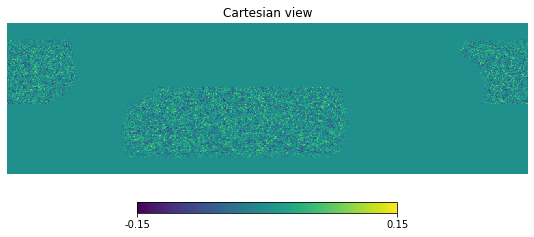

In [31]:
hp.cartview(Msa*cgmap,latra=[-75,30],min=-0.15,max=0.15)

In [10]:
ikalm = prjlib.load_input_plm( pobj.fpalm[1], lmax, ktype='k' )

In [17]:
ikmap = cs.utils.hp_alm2map(nside,lmax,lmax,ikalm[:lmax+1,:lmax+1])

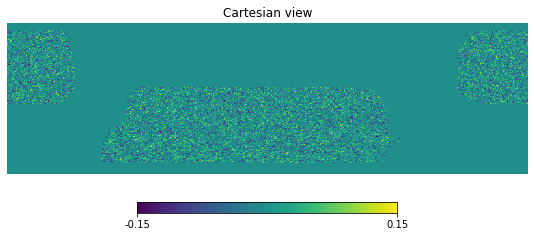

In [30]:
hp.cartview(Msa*ikmap,latra=[-75,30],min=-0.15,max=0.15)